# Finding the centre of gravity

In [1]:
#importing libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
# setting the figure sizes. You can skip this cell if you want 
# but if you want to see larger images that will be easy to comprehend
# I suggest that you should run this cell

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Current size: [16.0, 9.0]


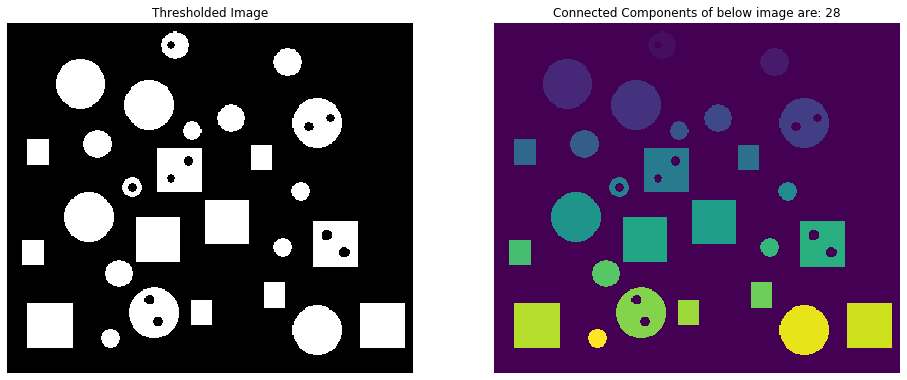

In [13]:
#reading the image
img = cv2.imread("images/input_image.png",0)

# binary thresholding the image
_,img2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# finding the connected components
connected_components,img3 = cv2.connectedComponents(img2,4)
plt.subplot(121),plt.imshow(img2, cmap = 'gray'),plt.title('Thresholded Image')
plt.axis('off')
plt.subplot(122),plt.imshow(img3),plt.title('Connected Components of below image are: %d' %connected_components)
plt.axis('off')
plt.show()


(-0.5, 383.5, 330.5, -0.5)

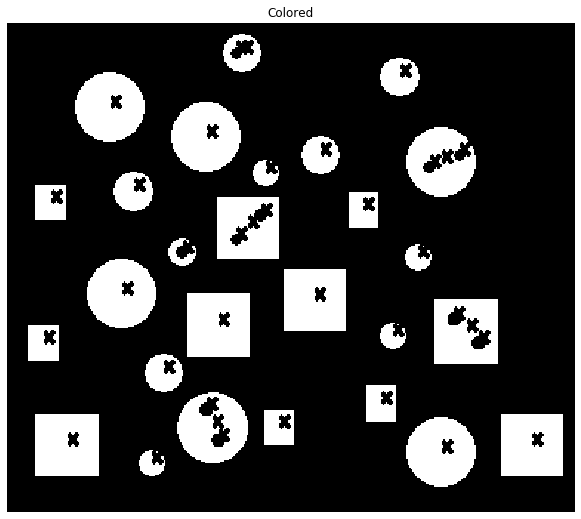

In [14]:
ccc = []
contours, hierarchy = cv2.findContours(img2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    M = cv2.moments(c)
 
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    ccc.append([cX,cY])
    cv2.putText(img, "x", (cX, cY),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
 
plt.imshow(img, cmap = 'gray'),plt.title('Colored')
plt.axis('off')